In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [37]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # Adds the extra dimension at axis 1 (makes it a matrix)
t_u = torch.tensor(t_u).unsqueeze(1) # Adds the extra dimension at axis 1

t_u.shape

torch.Size([11, 1])

In [38]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([3, 9, 2, 1, 4, 8, 6, 7, 5]), tensor([10,  0]))

In [39]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [40]:
linear_model = nn.Linear(1,1) # accepts number of input features, number of output features, 
                              # and whether a model includes bias or not. Defaults to True. 

linear_model(t_un_val) # provides prediction or output

tensor([[-3.4738],
        [-1.4630]], grad_fn=<AddmmBackward>)

In [41]:
linear_model.weight

Parameter containing:
tensor([[-0.6149]], requires_grad=True)

In [42]:
linear_model.bias

Parameter containing:
tensor([0.7321], requires_grad=True)

In [43]:
x = torch.ones(1)
linear_model(x)

tensor([0.1172], grad_fn=<AddBackward0>)

In [44]:
x = torch.ones(10,1)
linear_model(x)

tensor([[0.1172],
        [0.1172],
        [0.1172],
        [0.1172],
        [0.1172],
        [0.1172],
        [0.1172],
        [0.1172],
        [0.1172],
        [0.1172]], grad_fn=<AddmmBackward>)

In [45]:
linear_model = nn.Linear(1,1)
optimizer = optim.SGD(linear_model.parameters(), lr = 1.e-2)

In [46]:
linear_model.parameters()

<generator object Module.parameters at 0x7f3656acc650>

In [47]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.0255]], requires_grad=True),
 Parameter containing:
 tensor([-0.7082], requires_grad=True)]

In [48]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f}," f" Validation loss {loss_val.item():.4f}")

In [49]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 76.2394, Validation loss 106.9001
Epoch 1000, Training loss 3.8336, Validation loss 7.4260
Epoch 2000, Training loss 3.0084, Validation loss 3.9479
Epoch 3000, Training loss 2.9803, Validation loss 3.4344

Parameter containing:
tensor([[5.1389]], requires_grad=True)
Parameter containing:
tensor([-16.1375], requires_grad=True)


In [50]:
seq_model = nn.Sequential(nn.Linear(1, 13), nn.Tanh(), nn.Linear(13,1))

In [51]:
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [52]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [53]:
for name, param in seq_model.named_parameters(): print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [55]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([ ('hidden_linear', nn.Linear(1, 8)), 
                                       ('hidden_activation', nn.Tanh()), 
                                       ('output_linear', nn.Linear(8, 1))
                                      ])) 
seq_model


Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [56]:
for name, param in seq_model.named_parameters(): print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [57]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2085], requires_grad=True)

In [63]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val)) 
print('answer', t_c_val) 
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.9222, Validation loss 1.7067
Epoch 1000, Training loss 1.9803, Validation loss 2.1574
Epoch 2000, Training loss 1.9726, Validation loss 2.4181
Epoch 3000, Training loss 1.9894, Validation loss 2.6355
Epoch 4000, Training loss 1.9903, Validation loss 2.7838
Epoch 5000, Training loss 1.9822, Validation loss 2.8924
output tensor([[19.6977],
        [ 2.6259]], grad_fn=<AddmmBackward>)
answer tensor([[21.0000],
        [ 0.5000]])
hidden tensor([[  0.1118],
        [  0.3449],
        [-18.0550],
        [  0.0372],
        [  1.3214],
        [ 13.7817],
        [-17.3478],
        [ -0.6072]])


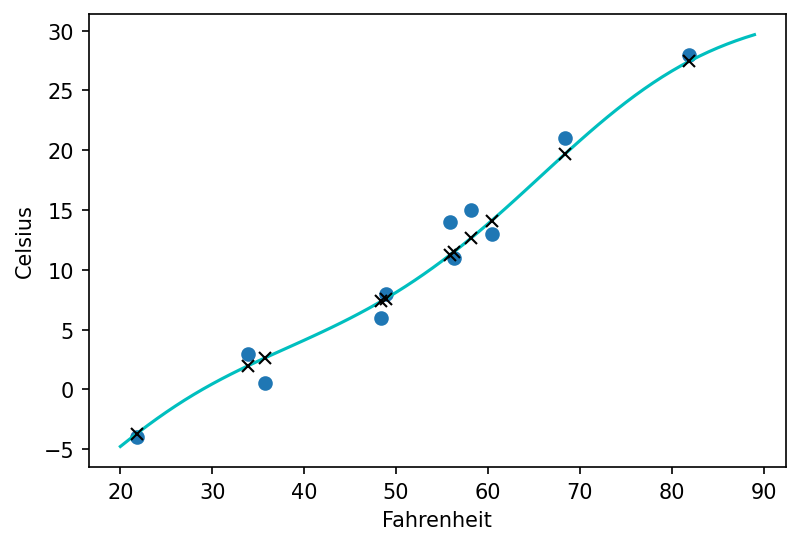

In [64]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')